In [1]:
from __future__ import print_function

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline


import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian_kmers', flotilla_dir=flotilla_dir)
not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

psi = study.splicing.singles.ix[not_outliers]
grouped = psi.groupby(study.sample_id_to_phenotype)
psi_filtered = grouped.apply(lambda x: x.dropna(axis=1, thresh=10))

2017-01-13 10:51:43	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian_kmers/datapackage.json
2017-01-13 10:51:43	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-13 10:53:11 	Initializing Study
2017-01-13 10:53:11 	Initializing Predictor configuration manager for Study
2017-01-13 10:53:11	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-13 10:53:11	Added ExtraTreesClassifier to default predictors
2017-01-13 10:53:11	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-13 10:53:11	Added ExtraTreesRegressor to default predictors
2017-01-13 10:53:11	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-13 10:53:11	Added GradientBoostingClassifier to default predictors
2017-01-13 10:53:11	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-13 10:53:11	Added GradientBoostingRegressor to default predictors
2017-01-13 10:53:11 	Loading metadata
2017-01-13 10:53:11	Loading expression data
2017-0

In [2]:
study.splicing.minimum_samples

10

In [3]:
study.splicing.maybe_renamed_to_feature_id("RPS24")

Index([u'isoform1=junction:chr10:79797063-79797722:+|isoform2=junction:chr10:79797063-79797196:+@novel_exon:chr10:79797197-79797199:+@junction:chr10:79797200-79797722:+',
       u'isoform1=junction:chr10:79797063-79799961:+|isoform2=junction:chr10:79797063-79797196:+@novel_exon:chr10:79797197-79797199:+@junction:chr10:79797200-79799961:+',
       u'isoform1=junction:chr10:79797063-79799961:+|isoform2=junction:chr10:79797063-79797722:+@exon:chr10:79797723-79797740:+@junction:chr10:79797741-79799961:+',
       u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79797196:+@novel_exon:chr10:79797197-79797199:+@junction:chr10:79797200-79800372:+',
       u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79797722:+@exon:chr10:79797723-79797740:+@junction:chr10:79797741-79800372:+',
       u'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79797722:+@novel_exon:chr10:79797723-79797751:+@junction:chr10:79797752

In [4]:
study.supplemental.modalities_tidy.query('modality == "middle"')['event_id'].values

array([ 'isoform1=junction:chr10:79797063-79800372:+|isoform2=junction:chr10:79797063-79799961:+@exon:chr10:79799962-79799983:+@junction:chr10:79799984-79800372:+'], dtype=object)

In [5]:
figure_folder = 'figures/32_cisbp_ttest_enrichment'
! mkdir -p $figure_folder

## Match known motifs to kmers

In [6]:
import kvector

cisbp_folder = '/projects/ps-yeolab/obotvinnik/cisbp_v2'

# cisbp_motifs = kvector.read_motifs('{}/pwms_homer/all_rbps.motif'.format(cisbp_folder), 'ACGT')

In [7]:
ls $cisbp_folder/*csv

/projects/ps-yeolab/obotvinnik/cisbp_v2/cisbp_kvector_456.csv
/projects/ps-yeolab/obotvinnik/cisbp_v2/cisbp_motif_metadata.csv
/projects/ps-yeolab/obotvinnik/cisbp_v2/kmers_in_cisbp_motifs_thresh05.csv


In [8]:
cisbp_kmers = pd.read_csv('{}/kmers_in_cisbp_motifs_thresh05.csv'.format(cisbp_folder), index_col=0)
cisbp_kmers.head()

,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M006_0.6_CG14718_CONSTRUCT_CG14718_CONSTRUCT_RNAcompete_CONSTRUCTS,M007_0.6_CG2950_FBgn0031637_Drosophila_melanogaster,M008_0.6_CNOT4_ENSPTRG00000019727_Pan_troglodytes,M009_0.6_CG33714_FBgn0064117_Drosophila_melanogaster,M010_0.6_CG5213_FBgn0038345_Drosophila_melanogaster,...,M345_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M346_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M347_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M348_0.6_SNRPB2_ENSG00000125870_Homo_sapiens,M349_0.6_PABPC1L_ENSG00000101104_Homo_sapiens,M350_0.6_ZFP36_ENSG00000128016_Homo_sapiens,M351_0.6_SRSF1_ENSG00000136450_Homo_sapiens,M352_0.6_ENSG00000180771_ENSG00000180771_Homo_sapiens,M353_0.6_SRSF7_ENSG00000115875_Homo_sapiens,M354_0.6_YTHDC1_ENSG00000083896_Homo_sapiens
AAAA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
AAAC,False,False,False,False,False,False,True,True,False,False,...,True,False,False,False,True,False,True,False,False,False
AAAG,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,False,True,False
AAAT,False,False,False,False,False,False,False,True,False,False,...,False,True,False,True,True,True,False,False,False,False
AACA,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,True,False,False


In [9]:
cisbp_metadata = pd.DataFrame.from_records(list(cisbp_kmers.columns.map(lambda x: x.split()[0].split('_'))))
# cisbp_metadata = cisbp_metadata.replace(None, np.nan)
cisbp_metadata.index = cisbp_kmers.columns.map(lambda x: x.split()[0])
cisbp_metadata = cisbp_metadata.rename(columns={0:'Motif ID', 1: "Version", 2: "RBP Name", 3: "RBP ID", 4: "Genus", 5: "Species"})
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,10,11,12,13,14,15,16,17,18,19
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,None,None,None,None,None,None,None,None,None,None


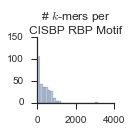

In [10]:
sns.set(style='ticks')    
fig, ax = plt.subplots(figsize=(2, 2))
sns.distplot(cisbp_kmers.sum(), kde=False)
ax.locator_params(nbins=3)
xmin, xmax = ax.get_xlim()
ax.set(xlim=(0, xmax), title='# $k$-mers per\nCISBP RBP Motif')
sns.despine()
fig.tight_layout()
fig.savefig('{}/cisbp_kmer_distribution.pdf'.format(figure_folder))

In [11]:
kmer_sum = cisbp_kmers.sum()
kmer_sum[kmer_sum > 2000]

M255_0.6_PUM1_ENSG00000134644_Homo_sapiens    3153
dtype: int64

In [12]:
kmer_zscores = {'phenotype': study.supplemental.kmer_zscores_background_phenotype,
                'modality': study.supplemental.kmer_zscores_background_modality,
                'constitutive': study.supplemental.kmer_zscores_background_constitutive}

In [13]:
from scipy.stats import ttest_1samp
# kmer_means = study.supplemental.kmer_zscores.mean()

# kmer_cisbp_ttest = pd.DataFrame(index=cisbp_kmers.columns, columns=study.supplemental.kmer_scores.columns)

lines = []

for background_name, zscores in kmer_zscores.items():
    zscore_means = zscores.mean()
    for intron_name, intron_col in zscores.iteritems():
        for cisbp_name, cisbp_kmer in cisbp_kmers.iteritems():
            x = intron_col[cisbp_kmer]
            y = intron_col
    #         sign = np.sign(x.median() - y.median())
    #         statistic, p_value = mannwhitneyu(x, y)
    #         statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], kmer_means[intron_name])
            statistic, p_value = ttest_1samp(intron_col[cisbp_kmer], zscore_means[intron_name])
            lines.append([intron_name, cisbp_name, statistic, p_value, background_name])
cisbp_ttest = pd.DataFrame(lines, columns=['Intron', 'RBP Motif long', 'T-Statistic', '$p$-value', 'background'])
print(cisbp_ttest.shape)
cisbp_ttest.head()

(34749, 5)


,Intron,RBP Motif long,T-Statistic,$p$-value,background
0,MN_bimodal_background=constitutive_exonbody,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-0.912235,0.370027,constitutive
1,MN_bimodal_background=constitutive_exonbody,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-2.235447,0.029059,constitutive
2,MN_bimodal_background=constitutive_exonbody,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,-4.310075,0.000030,constitutive
3,MN_bimodal_background=constitutive_exonbody,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-2.757411,0.006036,constitutive
4,MN_bimodal_background=constitutive_exonbody,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,-4.329200,0.000072,constitutive


In [20]:
cisbp_ttest['Intron'] = cisbp_ttest['Intron'].str.replace('_background=[a-z]+', '')
cisbp_ttest.head()

,Intron,RBP Motif long,T-Statistic,$p$-value,background
0,MN_bimodal_exonbody,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-0.912235,0.370027,constitutive
1,MN_bimodal_exonbody,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-2.235447,0.029059,constitutive
2,MN_bimodal_exonbody,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,-4.310075,0.000030,constitutive
3,MN_bimodal_exonbody,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-2.757411,0.006036,constitutive
4,MN_bimodal_exonbody,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,-4.329200,0.000072,constitutive


In [21]:
sns.set(style='ticks', context='talk')

In [22]:
cisbp_metadata.loc[cisbp_metadata['RBP Name'] == 'MBNL3']

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,10,11,12,13,14,15,16,17,18,19
M037_0.6_MBNL3_ENSG00000076770_Homo_sapiens,M037,0.6,MBNL3,ENSG00000076770,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None
M320_0.6_MBNL3_ENSG00000076770_Homo_sapiens,M320,0.6,MBNL3,ENSG00000076770,Homo,sapiens,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [23]:
# rbp_name = 'MBNL3'

# cisbp_ids = cisbp_metadata.loc[cisbp_metadata['RBP Name'] == rbp_name].index
# for cisbp_id in cisbp_ids:
#     x = study.supplemental.kmer_zscores['upstream200nt_iPSC_bimodal_placental']
#     y = x[cisbp_kmers[cisbp_id]]

#     fig, ax = plt.subplots(figsize=(2, .75))

#     bins = np.linspace(x.min(), x.max(), 50)
#     sns.distplot(x, kde=True, hist=False, label='iPSC bimodal upstream', bins=bins, 
#                  color='grey', kde_kws=dict(shade=True, linewidth=1))
#     sns.distplot(y, kde=True, hist=False, label=rbp_name, bins=bins, rug=True, rug_kws=dict(height=0.3),
#                  kde_kws=dict(shade=True, linewidth=1), color='#262626')
#     ax.locator_params(nbins=4)
#     ax.legend(loc='best', fontsize=10)
#     sns.despine(left=True)
#     ax.legend_.set_visible(False)
#     ax.set(xlabel='', xticks=[], yticks=[])
#     fig.tight_layout()
#     fig.savefig('{}/distplot_{}_vs_ipsc_bimodal_upstream.pdf'.format(figure_folder, cisbp_id))
# # ymin, ymax = ax.get_ylim()
# # ax.vlines(y, 0, ymax*.1, alpha=0.5)

In [24]:
cisbp_ttest['RBP Motif'] = cisbp_ttest['RBP Motif long'].str.split().str.get(0)
cisbp_ttest.head()

,Intron,RBP Motif long,T-Statistic,$p$-value,background,RBP Motif
0,MN_bimodal_exonbody,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-0.912235,0.370027,constitutive,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens
1,MN_bimodal_exonbody,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-2.235447,0.029059,constitutive,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens
2,MN_bimodal_exonbody,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,-4.310075,0.000030,constitutive,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...
3,MN_bimodal_exonbody,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-2.757411,0.006036,constitutive,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens
4,MN_bimodal_exonbody,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,-4.329200,0.000072,constitutive,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans


In [25]:
cisbp_metadata['Full Species'] = cisbp_metadata['Genus'] + ' ' + cisbp_metadata['Species']
cisbp_metadata.head()

,Motif ID,Version,RBP Name,RBP ID,Genus,Species,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Full Species
M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,M001,0.6,A1CF,ENSG00000148584,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,M002,0.6,ANKRD17,ENSG00000132466,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M003_0.6_FBgn0262475_FBgn0262475_Drosophila_melanogaster,M003,0.6,FBgn0262475,FBgn0262475,Drosophila,melanogaster,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Drosophila melanogaster
M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,M004,0.6,BRUNOL4,ENSG00000101489,Homo,sapiens,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Homo sapiens
M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,M005,0.6,tiar-3,C07A4.1,Caenorhabditis,elegans,None,None,None,None,...,None,None,None,None,None,None,None,None,None,Caenorhabditis elegans


In [31]:
sns.set(context='paper', style='white')

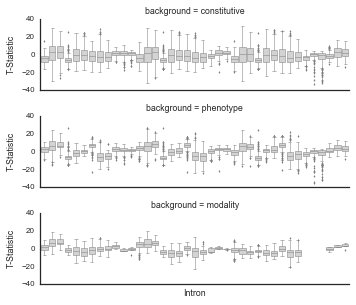

In [35]:
g = sns.factorplot(x='Intron', y='T-Statistic', data=cisbp_ttest, 
                   aspect=4, size=1.5, color='lightgrey', row='background', 
                   kind='box', linewidth=0.5, fliersize=2)
g.set(xticks=[])
for ax in g.axes.flat:
    ax.locator_params(nbins=4, axis='y')

# plt.setp(ax.get_xticklabels(), rotation=90);
# sns.despine()
# fig.tight_layout()
g.savefig('{}/cisbp_t_statistic_boxplots.pdf'.format(figure_folder))

## Filter for only splicing RBPs in Humans

In [36]:
cisbp_ttest.head()

,Intron,RBP Motif long,T-Statistic,$p$-value,background,RBP Motif
0,MN_bimodal_exonbody,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-0.912235,0.370027,constitutive,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens
1,MN_bimodal_exonbody,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-2.235447,0.029059,constitutive,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens
2,MN_bimodal_exonbody,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...,-4.310075,0.000030,constitutive,M003_0.6_FBgn0262475_FBgn0262475_Drosophila_me...
3,MN_bimodal_exonbody,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-2.757411,0.006036,constitutive,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens
4,MN_bimodal_exonbody,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans,-4.329200,0.000072,constitutive,M005_0.6_tiar-3_C07A4.1_Caenorhabditis_elegans


In [41]:
human_rbps = cisbp_metadata.index[cisbp_metadata['Full Species'] == 'Homo sapiens']
print(len(human_rbps))
human_rbps[:5]

172


Index([u'M001_0.6_A1CF_ENSG00000148584_Homo_sapiens',
       u'M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens',
       u'M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens',
       u'M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens',
       u'M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens'],
      dtype='object')

In [57]:
cisbp_ttest_human = cisbp_ttest.loc[cisbp_ttest['RBP Motif'].isin(human_rbps)]
print(cisbp_ttest_human.shape)
cisbp_ttest_human.head()

(20124, 6)


,Intron,RBP Motif long,T-Statistic,$p$-value,background,RBP Motif
0,MN_bimodal_exonbody,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens,-0.912235,0.370027,constitutive,M001_0.6_A1CF_ENSG00000148584_Homo_sapiens
1,MN_bimodal_exonbody,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens,-2.235447,0.029059,constitutive,M002_0.6_ANKRD17_ENSG00000132466_Homo_sapiens
3,MN_bimodal_exonbody,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens,-2.757411,0.006036,constitutive,M004_0.6_BRUNOL4_ENSG00000101489_Homo_sapiens
11,MN_bimodal_exonbody,M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens,-3.104151,0.002398,constitutive,M012_0.6_CPEB3_ENSG00000107864_Homo_sapiens
12,MN_bimodal_exonbody,M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens,-3.042918,0.002460,constitutive,M013_0.6_DAZAP1_ENSG00000071626_Homo_sapiens


## PCA

In [74]:
from sklearn.decomposition import PCA

import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib as mpl

from anchor import MODALITY_TO_COLOR

# for background, zscores in kmer_zscores.items():


def retain_cols(data, retain=('included', 'bimodal', 'excluded')):
    try:
        data = data[[col for col in data if any([r in col for r in retain])]]
    except TypeError:
        pass
    return data

def kmer_pcaplot(zscores, background, filename, retain=('included', 'excluded', 'bimodal'), transpose=False):
#     zscores = kmer_zscores[background]

    data = zscores.fillna(0)
    data = retain_cols(data, retain=retain)
    
    if transpose:
        data = data.T
        title += '-transposed'
        
    
    print(data.shape)
    

    pca = PCA(n_components=2)
    reduced = pd.DataFrame(pca.fit_transform(data), 
                           index=data.index)
    reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
    # reduced = reduced
    print('\t', reduced.shape)
    reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))

    #     text = ['{}<br>{}'.format(y, x.split('_')[0]) for x, y  in zip(reduced.index, gene_names)]
    trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='Motifs',
                        marker=dict(size=10, opacity=0.5, color='black'), text=reduced.index)

    
    lines = []
    metadata = pd.DataFrame(list(data.columns.map(lambda x: x.split('_'))), 
                            index=data.columns, columns=['phenotype', 'modality', 'location'])
    components = pd.DataFrame(pca.components_, columns=data.columns)
    print('\t', metadata.shape)
    scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()
    for phenotype, phenotype_df in components.groupby(metadata['phenotype'], axis=1):
    #     linestyle = '-'
        if phenotype == 'iPSC':
            linestyle = 'solid'
        elif phenotype == 'NPC':
            linestyle = 'dash'
        else:
            linestyle = 'dot'
        for modality, modality_df in phenotype_df.groupby(metadata['modality'], axis=1):
            palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)))

            for color, (component, column) in zip(palette, modality_df.iteritems()):
                x = [0, column[0]*scaling_factor]
                y = [0, column[1]*scaling_factor]
                lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
                                        line=dict(color=color, width=5, dash=linestyle)))
    
    plotly_data = [trace0] + lines

    layout = go.Layout(
    #     autosize=False, width=500, height=500,
    title='CISBP motif t-test enrichments (background: {})'.format(background),
    hovermode='closest',
    xaxis=dict(
        title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
        ticklen=5,
        zeroline=False,
        gridwidth=0,
        ),
    yaxis=dict(
        title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
        ticklen=5,
        zeroline=True,
        gridwidth=0,
        ),
    )

    fig = go.Figure(data=plotly_data, layout=layout)
    return py.iplot(fig, filename=filename)

In [75]:
background = 'phenotype'

ttest_2d = cisbp_ttest_human.query('background == @background').pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
kmer_pcaplot(ttest_2d, 'cisbp-ttest-pca-background-{}'.format(background), background)

(172, 27)
	 (172, 2)
	 (27, 3)


In [70]:
background = 'constitutive'

ttest_2d = cisbp_ttest_human.query('background == @background').pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
kmer_pcaplot(ttest_2d, background)

(172, 27)
	 (172, 2)
	 (27, 3)


In [71]:
background = 'modality'

ttest_2d = cisbp_ttest_human.query('background == @background').pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
kmer_pcaplot(ttest_2d, background)

(172, 27)
	 (172, 2)
	 (27, 3)


## Use only RBPs which have splicing in their GO terms

In [49]:
import goatools
import collections
import mygene


GO_KEYS_FULL = 'go.BP', 'go.MF', 'go.CC'
GO_KEYS_SPLIT = [x.split('.')[1] for x in GO_KEYS_FULL]


def parse_mygene_output(mygene_output, ):
    """Convert mygene.querymany output to a gene id to go term mapping (dictionary)

    Parameters
    ----------
    mygene_output : dict or list
        Dictionary (returnall=True) or list (returnall=False) of
        output from mygene.querymany

    Output
    ------
    gene_name_to_go : dict
        Mapping of gene name to a set of GO terms
    """
    # if "returnall=True" was specified, need to get just the "out" key
    if isinstance(mygene_output, dict):
        mygene_output = mygene_output['out']

    gene_name_to_go = collections.defaultdict(set)

    for line in mygene_output:
        gene_name = line['query']
        try:
            go_output = line['go']
        except KeyError:
            continue
        for go_key in GO_KEYS_SPLIT:
            try:
                go_terms = go_output[go_key]
            except KeyError:
                continue
            if isinstance(go_terms, dict):
                go_ids = set([go_terms['term']])
            else:
                go_ids = set(x['term'] for x in go_terms)
        gene_name_to_go[gene_name] |= go_ids
    return gene_name_to_go


def gene_ids_to_go(gene_ids, species='human,mouse,rat',
                   scopes='entrezgene,ensemblgene,retired,symbol',
                   fields=GO_KEYS_FULL,
                   **kwargs):
    """Get associated GO terms for each gene ID

    gene_ids : iterable of ids
        List of gene ids that you want to map
    species : str
        Comma-separated species to limit search. Default is "human,mouse,rat"
    scopes : str
        Comma-separated type of gene ids that you are giving.
        Default is "entrezgene,ensemblgene,retired,symbol"
    fields : iterable
        GO terms to use. Default is ['go.BP', 'go.MF', 'go.CC']

    Returns
    -------
    gene_to_go : dict
        Mapping of each provided gene id to a set object of GO terms
    """

    mg = mygene.MyGeneInfo()

    mygene_output = mg.querymany(gene_ids, fields=fields, scopes=scopes,
                                 species=species, **kwargs)

    gene_name_to_go = parse_mygene_output(mygene_output)
    return gene_name_to_go


In [50]:

from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()

# Show the filename
obo_fname

  EXISTS: go-basic.obo


'go-basic.obo'

In [51]:

obo_dag = goatools.obo_parser.GODag(obo_file=obo_fname)

load obo file go-basic.obo
47943

go-basic.obo: format-version(1.2) data-version(releases/2017-01-13)


 nodes imported


In [52]:

# Initialize the "mygene.info" (http://mygene.info/) interface


mg = mygene.MyGeneInfo()

mygene_output = mg.querymany(cisbp_metadata.loc[human_rbps, 'RBP ID'], 
                             scopes='ensemblgene', fields=['go.BP', 'go.MF',], species='human', 
                             returnall=True)

gene_id_to_go = parse_mygene_output(mygene_output)

querying 1-172...done.
Finished.
34 input query terms found dup hits:
	[(u'ENSG00000131914', 2), (u'ENSG00000132819', 4), (u'ENSG00000112531', 2), (u'ENSG00000003756', 2),
6 input query terms found no hit:
	[u'ENSG00000131795', u'ENSG00000180771', u'ENSG00000180771', u'ENSG00000248163', u'ENSG00000180771',


In [53]:
gene_id_to_go

defaultdict(set,
            {u'ENSG00000003756': {u'DNA binding',
              u'RNA binding',
              u'mRNA binding',
              u'nucleotide binding',
              u'poly(A) RNA binding',
              u'protein binding',
              u'zinc ion binding'},
             u'ENSG00000004534': {u'DNA binding',
              u'RNA binding',
              u'nucleotide binding',
              u'poly(A) RNA binding',
              u'protein binding'},
             u'ENSG00000006047': {u'DNA binding', u'RNA binding'},
             u'ENSG00000015479': {u'nucleotide binding',
              u'poly(A) RNA binding',
              u'protein binding',
              u'structural molecule activity',
              u'zinc ion binding'},
             u'ENSG00000020577': {u'mRNA binding',
              u'poly(A) RNA binding',
              u'protein binding',
              u'translation repressor activity'},
             u'ENSG00000055917': {u'RNA binding',
              u"mRNA 3'-UTR binding

In [48]:
mygene_output

{'dup': [(u'ENSG00000131914', 2),
  (u'ENSG00000132819', 4),
  (u'ENSG00000112531', 2),
  (u'ENSG00000003756', 2),
  (u'ENSG00000143368', 4),
  (u'ENSG00000100320', 3),
  (u'ENSG00000116350', 2),
  (u'ENSG00000119314', 2),
  (u'ENSG00000173914', 2),
  (u'ENSG00000107864', 2),
  (u'ENSG00000163694', 2),
  (u'ENSG00000244395', 2),
  (u'ENSG00000128016', 2),
  (u'ENSG00000112081', 3),
  (u'ENSG00000159409', 3),
  (u'ENSG00000060138', 2),
  (u'ENSG00000104824', 2),
  (u'ENSG00000125870', 9),
  (u'ENSG00000078328', 2),
  (u'ENSG00000076770', 2),
  (u'ENSG00000066044', 5),
  (u'ENSG00000115875', 3),
  (u'ENSG00000063046', 2),
  (u'ENSG00000125944', 3),
  (u'ENSG00000154548', 4),
  (u'ENSG00000144642', 2),
  (u'ENSG00000101104', 3),
  (u'ENSG00000111786', 3),
  (u'ENSG00000116560', 2),
  (u'ENSG00000153944', 2),
  (u'ENSG00000107105', 2),
  (u'ENSG00000183570', 4),
  (u'ENSG00000116001', 2),
  (u'ENSG00000136450', 10)],
 'missing': [u'ENSG00000131795',
  u'ENSG00000180771',
  u'ENSG0000018077

In [47]:
gene_id_to_go

defaultdict(set,
            {u'ENSG00000003756': {u'GO:0000166',
              u'GO:0003677',
              u'GO:0003723',
              u'GO:0003729',
              u'GO:0005515',
              u'GO:0008270',
              u'GO:0044822'},
             u'ENSG00000004534': {u'GO:0000166',
              u'GO:0003677',
              u'GO:0003723',
              u'GO:0005515',
              u'GO:0044822'},
             u'ENSG00000006047': {u'GO:0003677', u'GO:0003723'},
             u'ENSG00000015479': {u'GO:0000166',
              u'GO:0005198',
              u'GO:0005515',
              u'GO:0008270',
              u'GO:0044822'},
             u'ENSG00000020577': {u'GO:0003729',
              u'GO:0005515',
              u'GO:0030371',
              u'GO:0044822'},
             u'ENSG00000055917': {u'GO:0003723',
              u'GO:0003730',
              u'GO:0005515',
              u'GO:0044822'},
             u'ENSG00000060138': {u'GO:0000977',
              u'GO:0001227',
          

In [29]:
# fig, ax = plt.subplots(figsize=(4, 1.5))

# kwargs = dict(linewidth=1, fliersize=2, color='grey')

# sns.boxplot(x='Intron', y='T-Statistic', data=kmer_cisbp_utest_tidy, ax=ax, **kwargs)
# # ax.locator_params(nbins=4, axis='y')
# ax.set(xlabel='', xticks=[], ylabel='', ylim=(-30, 30), yticks=(-30, 0, 30))
# sns.despine(ax=ax, bottom=True)
# fig.savefig('{}/t_statistic_boxplots.pdf'.format(figure_folder))

In [ ]:
t_statistic = kmer_cisbp_utest_tidy.pivot(index='RBP Motif', columns='Intron', values='T-Statistic')
print t_statistic.shape
t_statistic.head()

In [ ]:
t_statistic = t_statistic[study.supplemental.kmer_zscores.columns]

In [ ]:
t_statistic_homo_sapiens = t_statistic.loc[cisbp_metadata['Full Species'] == 'Homo sapiens']
print t_statistic_homo_sapiens.shape
t_statistic_homo_sapiens.head()

## Save the study

In [ ]:
study.supplemental.cisbp_ttest = cisbp_ttest
study.supplemental.cisbp_metadata = cisbp_metadata

In [ ]:
study.save('singlecell_pnm_figure2_modalities_bayesian_kmers_cisbp', flotilla_dir=flotilla_dir)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 1.5))

kwargs = dict(linewidth=1, fliersize=2, color='grey')

sns.boxplot(t_statistic_homo_sapiens, ax=ax, **kwargs)
# ax.locator_params(nbins=4, axis='y')
ax.set(xlabel='', xticks=[], ylabel='', ylim=(-30, 30), yticks=(-30, 0, 30))
sns.despine(ax=ax, bottom=True)
fig.savefig('{}/t_statistic_homo_sapiens_boxplots.pdf'.format(figure_folder))

In [ ]:
sns.distplot(t_statistic_homo_sapiens.values.flat)

In [ ]:
g = sns.clustermap(t_statistic_homo_sapiens, col_colors=intron_colors[t_statistic_homo_sapiens.columns].values)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/t_statistic_homo_sapiens_clustermap.pdf'.format(figure_folder))

In [ ]:
g = sns.clustermap(t_statistic_homo_sapiens.corr(), 
                   row_colors=intron_colors[t_statistic_homo_sapiens.columns].values, 
                   col_colors=intron_colors[t_statistic_homo_sapiens.columns].values)
g.ax_heatmap.set(xticks=[], yticks=[])
g.savefig('{}/t_statistic_homo_sapiens_correlated_clustermap.pdf'.format(figure_folder))

In [ ]:
cutoff = t_statistic_homo_sapiens.mean() + 2*t_statistic_homo_sapiens.std()

t_statistic_filtered = t_statistic_homo_sapiens[t_statistic_homo_sapiens >=  cutoff]
t_statistic_filtered = t_statistic_filtered.dropna(how='all')
# mask = t_statistic_filtered.isnull()
# t_statistic_filtered = t_statistic_filtered.fillna(0)
print t_statistic_filtered.shape
t_statistic_filtered.head()

In [ ]:

uncategorized_middle_t_statistic = t_statistic_filtered.loc[:, uncategorized_middle_cols].dropna(how='all')
uncategorized_middle_t_statistic.head()

In [ ]:
sns.set(context='talk', style='ticks')
fig, ax = plt.subplots()
sns.heatmap(uncategorized_middle_t_statistic.dropna(how='all', axis=1), annot=True)
plt.setp(ax.get_xticklabels(), rotation=90);
fig.tight_layout()

In [ ]:
study.plot_gene('RBMS3')

In [ ]:
# g = sns.clustermap(t_statistic_filtered.T, figsize=(28, 4), row_colors=intron_colors)
# g.savefig('{}/intron_kmers_vs_cisbp_t_statistic_filtered_transposed.pdf'.format(figure_folder))

In [ ]:
# g = sns.clustermap(t_statistic_filtered, figsize=(4, 28), col_colors=intron_colors)
# g.savefig('{}/intron_kmers_vs_cisbp_u_statistic_filtered.pdf'.format(figure_folder))

In [ ]:
splicing_rows = study.gene_ontology.data['GO Term Name'].str.contains('splic') \
    & ~study.gene_ontology.data['GO Term Name'].str.contains('tRNA') \
    & ~study.gene_ontology.data['GO Term Name'].str.contains('intein') \
    & ~study.gene_ontology.data['GO Term Name'].str.contains('assembly')

for x in sorted(study.gene_ontology.data.loc[splicing_rows, 'GO Term Name'].unique()):
    print x

In [ ]:
splicing_genes = study.gene_ontology.data.loc[splicing_rows, 'Ensembl Gene ID'].unique()
splicing_genes[:10]

In [ ]:
elavls = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.contains('ELAVL')]
elavls

In [ ]:
hnrnps = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.contains('HNRNP')]
hnrnps

In [ ]:
srsfs = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.contains('SRSF')]
srsfs

In [ ]:
sf3s = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.startswith('SF3')]
sf3s

In [ ]:
fmrs = study.expression.feature_data.index[study.expression.feature_data['gene_name'].str.startswith('FMR')]
fmrs

In [ ]:
splicing_genes = np.unique(np.concatenate([splicing_genes, elavls, hnrnps, srsfs, sf3s, fmrs]))
len(splicing_genes)

In [ ]:
splicing_gene_names = study.expression.feature_data.loc[splicing_genes, 'gene_name'].dropna().values

for i in range(1, 4):
    print(i)
    assert 'RBFOX{}'.format(i) in splicing_gene_names
    assert 'MBNL{}'.format(i) in splicing_gene_names
assert 'NOVA1' in splicing_gene_names
assert 'ELAVL1' in splicing_gene_names
assert 'FMR1' in splicing_gene_names

In [ ]:
cisbp_metadata_splicing = cisbp_metadata.loc[cisbp_metadata['RBP ID'].isin(splicing_genes)]
cisbp_metadata_splicing.head()

In [ ]:
(cisbp_metadata_splicing['RBP Name'] == "ELAVL1").sum()

In [ ]:
t_statistic_splicing = t_statistic.loc[cisbp_metadata['RBP ID'].isin(splicing_genes)]
print t_statistic_splicing.shape
t_statistic_splicing.head()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 1.5))

kwargs = dict(linewidth=1, fliersize=2, color='grey')

sns.boxplot(t_statistic_splicing, ax=ax, **kwargs)
# ax.locator_params(nbins=4, axis='y')
ax.set(xlabel='', xticks=[], ylabel='', ylim=(-30, 30), yticks=(-30, 0, 30))
sns.despine(ax=ax, bottom=True)
fig.savefig('{}/t_statistic_splicing_boxplots.pdf'.format(figure_folder))

In [ ]:
cisbp_metadata.head()

In [ ]:
splicing_rbp_names = cisbp_metadata.loc[t_statistic_splicing.index, 'RBP Name'].str.strip(' ')

Fully rename everything so there's no ENSG...

In [ ]:
splicing_rbp_names = splicing_rbp_names.map(lambda x: study.expression.feature_data.loc[x, 'gene_name'] if x in study.expression.feature_data.index else x)

In [ ]:
sns.set(style='white')
g = sns.clustermap(t_statistic_splicing, method='ward',
                   col_colors=intron_colors[t_statistic_splicing.columns].values, 
                   yticklabels=splicing_rbp_names, figsize=(10, 12))
g.ax_heatmap.set(xticks=[]);
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=6);
g.savefig('{}/t_statistic_splicing_clustermap.pdf'.format(figure_folder))

## PCA of CISBP kmers

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
t_statistic_homo_sapiens.head()

In [ ]:
excluded_bimodal_included_cols = [x for x in t_statistic_homo_sapiens.columns if 'bimodal' in x or 'included' in x or 'excluded' in x]
excluded_bimodal_included_cols

In [ ]:
t_statistic_excluded_bimodal_included = t_statistic_splicing[excluded_bimodal_included_cols]

In [ ]:
excluded_bimodal_included_phenotype_colors = [study.phenotype_to_color[x.split('_')[1]] for x in excluded_bimodal_included_cols]
excluded_bimodal_included_modality_colors = [MODALITY_TO_COLOR[x.split('_')[2]] for x in excluded_bimodal_included_cols]
excluded_bimodal_included_direction_colors = [direction_to_color[x.split('_')[0].rstrip('nt').rstrip('0123456789')] for x in 
                                              excluded_bimodal_included_cols]
excluded_bimodal_included_intron_colors = pd.DataFrame([excluded_bimodal_included_modality_colors, 
                                           excluded_bimodal_included_direction_colors, 
                                           excluded_bimodal_included_phenotype_colors], columns=excluded_bimodal_included_cols)
excluded_bimodal_included_intron_colors

In [ ]:
sns.set(style='white')
g = sns.clustermap(t_statistic_excluded_bimodal_included, method='ward',
                   col_colors=excluded_bimodal_included_intron_colors.values, 
                   yticklabels=splicing_rbp_names, figsize=(4, 8))
g.ax_heatmap.set(xticks=[]);
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=4);
g.savefig('{}/t_statistic_excluded_bimodal_included_splicing_clustermap.pdf'.format(figure_folder))

In [ ]:
data = t_statistic_excluded_bimodal_included

pca = PCA(n_components=2)
reduced = pd.DataFrame(pca.fit_transform(data), 
                       index=data.index)
reduced.columns = reduced.columns.map(lambda x: 'component_{}'.format(x))
# reduced = reduced
print reduced.shape
reduced.index = reduced.index.map(lambda x: x.replace('T', 'U'))
reduced.head()

In [ ]:
gene_names = reduced.index.map(lambda x: x.split('_')[2])
gene_names = [study.expression.feature_data.gene_name[x] if x in study.expression.feature_data.index else x for x in gene_names]
gene_names = [x if x != 'ENSG00000248163' else 'NOVA1' for x in gene_names]

In [ ]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
# ax.plot(reduced.iloc[:, 0], reduced.iloc[:, 1], color='none')
for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
    ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
            verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca.pdf'.format(figure_folder))

# ax.set(xlabel='', ylabel='')
# quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
#              'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
#              'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
#              'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}.pdf'.format(utest_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


In [ ]:
sns.set(style='ticks')

fig, ax = plt.subplots(figsize=(4, 3))
# for group1, df1 in reduced.groupby(study.supplemental.tier12_kmer_metadata['Tier']):
ax.scatter(reduced.iloc[:, 0], reduced.iloc[:, 1], color='k', alpha=0.5)
# for gene_name, (motif, row) in zip(gene_names, reduced.iterrows()):
#     ax.text(row[0], row[1], gene_name, horizontalalignment='center', clip_on=True,
#             verticalalignment='center', fontsize=8, alpha=0.75)
    
components = pd.DataFrame(pca.components_, columns=data.columns)

scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()

# for color, (component, column) in zip(palette, components.iteritems()):
labels = []
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = '-'
    elif phenotype == 'NPC':
        linestyle = 'dashed'
    else:
        linestyle = ':'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            labels.append(component)
            ax.plot([0, column[0]*scaling_factor], 
                    [0, column[1]*scaling_factor], label=component, 
                    linewidth=3, 
                    color=color, zorder=100, linestyle=linestyle)
# ax.legend()
xmin, ymin = reduced.min()*1.1
xmax, ymax = reduced.max()*1.1

ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
fig.tight_layout()
sns.despine(bottom=True, left=True)
ax.set(xticks=[], yticks=[]);
for i, explained_variance in enumerate(pca.explained_variance_ratio_):
    if i == 0:
        ax.set(xlabel='PC 1 explains {:d}% of variance'.format(int(explained_variance * 100)))
    else:
        ax.set(ylabel='PC 2 explains {:d}% of variance'.format(int(explained_variance * 100)))
fig.savefig('{}/kmer_cisbp_motif_pca_points.pdf'.format(figure_folder))

ax.set(xlabel='', ylabel='')
quadrants = {'upper_left': dict(xlim=(xmin, 0), ylim=(0, ymax)),
             'upper_right': dict(xlim=(0, xmax), ylim=(0, ymax)),
             'lower_left': dict(xlim=(xmin, 0), ylim=(ymin, 0)),
             'lower_right': dict(xlim=(0, xmax), ylim=(ymin, 0))}
# for quadrant, limits in quadrants.items():
#     ax.set(**limits)
#     fig.savefig('{}/kmer_cisbp_motif_pca_quadrant_{}_points.pdf'.format(figure_folder, quadrant))

# Make legend separately by hand
legend_fig, legend_ax = plt.subplots(figsize=(3, 4.25))#, fontdict=dict(fontsize=8))
legend_ax.legend(ax.lines, labels, ncol=1, loc='center', fontsize=8);
sns.despine(bottom=True, left=True, fig=legend_fig)
legend_ax.set(xticks=[], yticks=[]);
legend_fig.tight_layout()
legend_fig.savefig('{}/kmer_cisbp_motif_pca_legend.pdf'.format(figure_folder))


In [ ]:
import matplotlib as mpl

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go


text = ['{}<br>{}'.format(y, x.split('_')[0]) for x, y  in zip(reduced.index, gene_names)]
trace0 = go.Scatter(x=reduced.iloc[:, 0], y=reduced.iloc[:, 1], mode='markers', name='Motifs',
                    marker=dict(size=10, opacity=0.5, color='black'), text=text)

lines = []
scaling_factor = reduced.apply(np.linalg.norm, axis=1).max()
for phenotype, phenotype_df in components.groupby(study.supplemental.kmer_zscores_metadata['phenotype'], axis=1):
#     linestyle = '-'
    if phenotype == 'iPSC':
        linestyle = 'solid'
    elif phenotype == 'NPC':
        linestyle = 'dash'
    else:
        linestyle = 'dot'
    for modality, modality_df in phenotype_df.groupby(study.supplemental.kmer_zscores_metadata['modality'], axis=1):
        palette = map(mpl.colors.rgb2hex, reversed(sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)))

        for color, (component, column) in zip(palette, modality_df.iteritems()):
            x = [0, column[0]*scaling_factor]
            y = [0, column[1]*scaling_factor]
            lines.append(go.Scatter(x=x, y=y, mode='lines', name=component, text=component,
                                    line=dict(color=color, width=10, dash=linestyle)))
#             print tier, direction, component
#             labels.append(component)
#             ax.plot([0, column[0]], [0, column[1]], label=component, 
#                     linewidth=3, 
#                     color=color, zorder=100, linestyle=linestyle)

plotly_data = [trace0] + lines
layout = go.Layout(
#     autosize=False, width=500, height=500,
    title='Motif enrichment in modality k-mers (t-Test)',
    hovermode='closest',
    xaxis=dict(
        title='PC 1 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[0] * 100)),
        ticklen=5,
        zeroline=False,
        gridwidth=0,
    ),
    yaxis=dict(
        title='PC 2 explains {:d}% of variance'.format(int(pca.explained_variance_ratio_[1] * 100)),
        ticklen=5,
        zeroline=True,
        gridwidth=0,
    ),
)
fig = go.Figure(data=plotly_data, layout=layout)
py.iplot(fig, filename='motif-ttest-enrichment-modality-kmers-v3')

In [ ]:
figure_folder

In [ ]:
ax.get_xlim()

In [ ]:
reduced.apply(np.linalg.norm, axis=1).max()

In [ ]:
components

In [ ]:
sns.set?